<a href="https://colab.research.google.com/github/emshashank/scikit_learn_practice/blob/main/Decs_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jeevanrh/drug200csv")

print("Path to dataset files:", path)


100%|██████████| 1.69k/1.69k [00:00<00:00, 2.58MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jeevanrh/drug200csv/versions/1


In [3]:
import pandas as pd
df = pd.read_csv(path+"/drug200.csv")
df

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
print(df.duplicated())


0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


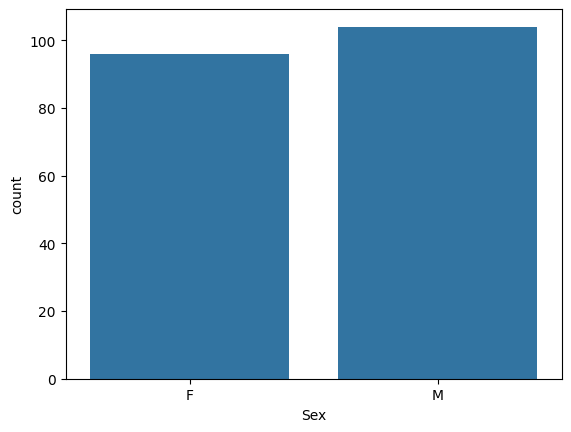

In [12]:
x = df.Sex.value_counts()
p = sns.countplot(data = df, x = "Sex")
plt.show()

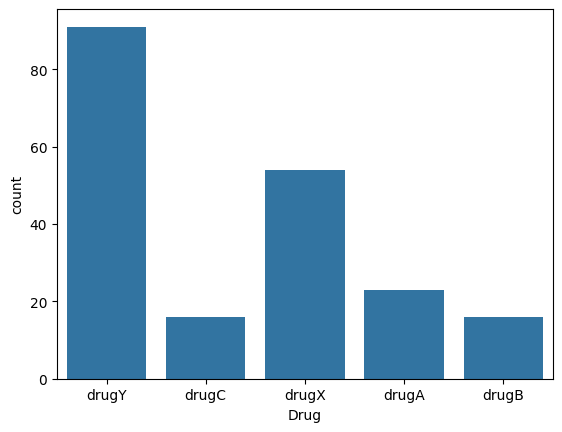

In [13]:
x = df.Drug.value_counts()
p = sns.countplot(data = df, x = "Drug")
#plt.show()

In [14]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [18]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['BP'] = oe.fit_transform(df[['BP']])
df['Sex'] = oe.fit_transform(df[['Sex']])
df['Cholesterol'] = oe.fit_transform(df[['Cholesterol']])
df['Drug'] = oe.fit_transform(df[['Drug']])


In [19]:
df

Age  Sex   BP  Cholesterol  Na_to_K  Drug
0     23  0.0  0.0          0.0   25.355   4.0
1     47  1.0  1.0          0.0   13.093   2.0
2     47  1.0  1.0          0.0   10.114   2.0
3     28  0.0  2.0          0.0    7.798   3.0
4     61  0.0  1.0          0.0   18.043   4.0
..   ...  ...  ...          ...      ...   ...
195   56  0.0  1.0          0.0   11.567   2.0
196   16  1.0  1.0          0.0   12.006   2.0
197   52  1.0  2.0          0.0    9.894   3.0
198   23  1.0  2.0          1.0   14.020   3.0
199   40  0.0  1.0          1.0   11.349   3.0

[200 rows x 6 columns]

In [22]:
y= df.iloc[:,-1]
x = df.iloc[:, 0:-1]
x


Age  Sex   BP  Cholesterol  Na_to_K
0     23  0.0  0.0          0.0   25.355
1     47  1.0  1.0          0.0   13.093
2     47  1.0  1.0          0.0   10.114
3     28  0.0  2.0          0.0    7.798
4     61  0.0  1.0          0.0   18.043
..   ...  ...  ...          ...      ...
195   56  0.0  1.0          0.0   11.567
196   16  1.0  1.0          0.0   12.006
197   52  1.0  2.0          0.0    9.894
198   23  1.0  2.0          1.0   14.020
199   40  0.0  1.0          1.0   11.349

[200 rows x 5 columns]

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, test_size=0.2)

In [24]:
x_train

Age  Sex   BP  Cholesterol  Na_to_K
79    32  0.0  1.0          1.0   10.840
197   52  1.0  2.0          0.0    9.894
38    39  0.0  2.0          1.0    9.709
24    33  0.0  1.0          0.0   33.486
122   34  1.0  2.0          0.0   22.456
..   ...  ...  ...          ...      ...
106   22  1.0  2.0          0.0   11.953
14    50  0.0  2.0          0.0   12.703
92    29  0.0  0.0          0.0   29.450
179   67  0.0  2.0          0.0   15.891
102   28  0.0  1.0          0.0   13.127

[160 rows x 5 columns]

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=0)
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)
y_pred_gini

array([3., 4., 3., 2., 4., 4., 4., 3., 0., 3., 0., 3., 4., 0., 1., 4., 1.,
       3., 2., 4., 1., 3., 3., 4., 4., 4., 2., 3., 4., 3., 4., 2., 2., 4.,
       0., 4., 3., 0., 4., 0.])

In [29]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_pred_gini, y_test))

1.0


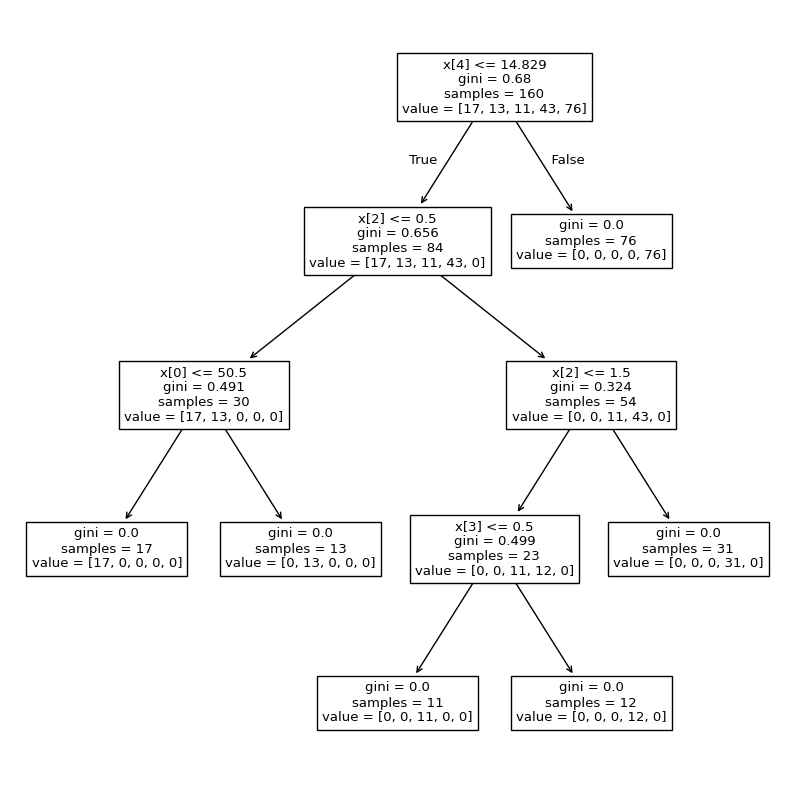

In [30]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_gini.fit(x_train, y_train))
plt.show(tree)

In [34]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
clf_entropy.fit(x_train, y_train)
y_pred_entropy = clf_entropy.predict(x_test)
print(accuracy_score(y_pred_entropy, y_test))

0.875


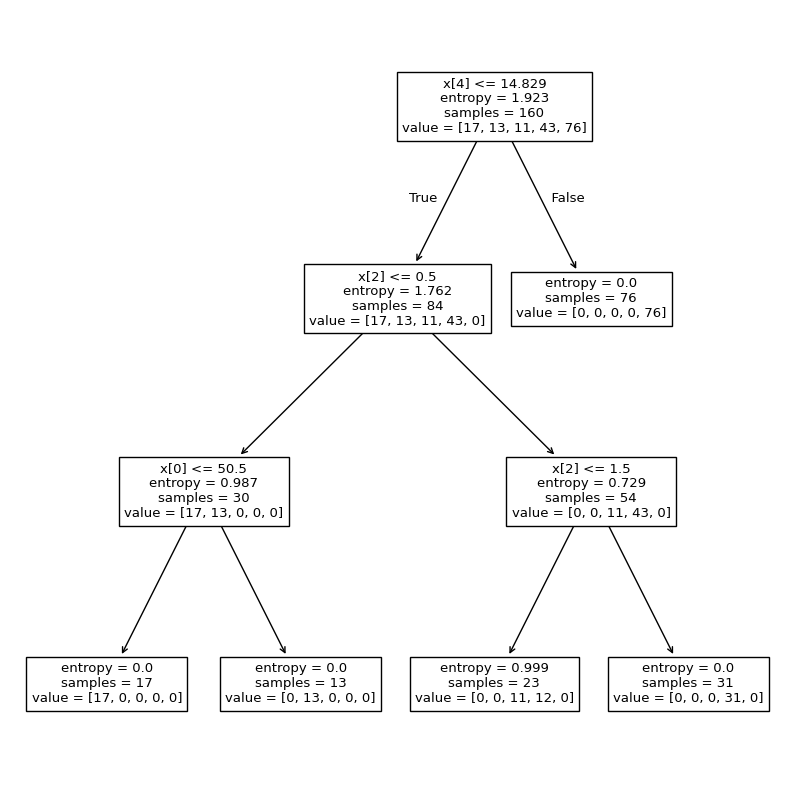

In [35]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_entropy.fit(x_train, y_train))
plt.show(tree)